<a href="https://colab.research.google.com/github/Madhusti-D/ML-CS-5783/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_data=pd.read_excel('/content/drive/MyDrive/CS5783 Assignment/Assignment 4 /Assignment_4_train.xlsx')
test_data= pd.read_excel('/content/drive/MyDrive/CS5783 Assignment/Assignment 4 /Assignment_4_test.xlsx')

X_train = training_data.drop(["House ID", "Construction type"], axis=1)
X_test = test_data.drop(["House ID", "Construction type"], axis =1)

Y_train = training_data["Construction type"]
Y_test = test_data["Construction type"]

features=X_train.columns
print("features:", features)


In [1]:
#MAP Rule

Posterior_Apt = np.zeros((len(X_train.index)))
for i in range(len(X_train.index)):
  Posterior_Apt[i] = Posterior_Apt
  for j in range(len(Prior.index)):
    Posterior_Apt[i] = Posterior_Apt[i]*AptProb.iloc[j,0]**X_train.iloc[i,j+1]

def accuracy_score(y_true, y_pred):
  return round(float(sum(y_pred == y_true))/float(len(y_true))*100 , 2)

SyntaxError: ignored

# Question 2

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz


In [13]:
training_data=pd.read_excel('/content/drive/MyDrive/CS5783 Assignment/Assignment 4 /Assignment_4_train.xlsx')
test_data= pd.read_excel('/content/drive/MyDrive/CS5783 Assignment/Assignment 4 /Assignment_4_test.xlsx')

X_train = training_data.drop(["House ID", "Construction type"], axis=1)
X_test = test_data.drop(["House ID", "Construction type"], axis =1)

Y_train = training_data["Construction type"]
Y_test = test_data["Construction type"]

features=X_train.columns
print("features:", features)



features: Index(['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Age of home'],
      dtype='object')


In [16]:
initial_=DecisionTreeClassifier()
basic_dt=initial_.fit(X_train, Y_train)

Y_pred = basic_dt.predict(X_train)
print("Accuracy of training set:", metrics.accuracy_score(Y_train,Y_pred))

Y_pred1 = basic_dt.predict(X_test)
print("Accuracy on testing set:", metrics.accuracy_score(Y_test,Y_pred1))

Accuracy of training set: 1.0
Accuracy on testing set: 0.4444444444444444


Question 2.1 -> While training with default parameters from sckit learn decision tree model, the accuracy of training set is 1.0 and test set is 0.4444.

We know that the decision tree will overfit the data while training and during testing the accuracy is less becuase there is no enough test data to improve accuracy.

In [18]:
accuracy_train = []
accuracy_test = []
for varying_depth in range(1,32):
  clf = DecisionTreeClassifier(max_depth=varying_depth)
  clf=clf.fit(X_train,Y_train)

  print("Maximum depth of the tree is", varying_depth)

  y_pred = clf.predict(X_train)
  print("Accuracy of training:",metrics.accuracy_score(Y_train, y_pred))
  accuracy_train.append(metrics.accuracy_score(Y_train, y_pred))

  y_pred = clf.predict(X_test)
  print("Accuracy of testing:",metrics.accuracy_score(Y_test, y_pred))
  accuracy_test.append(metrics.accuracy_score(Y_test, y_pred))


Maximum depth of the tree is 1
Accuracy of training: 0.6
Accuracy of testing: 0.3333333333333333
Maximum depth of the tree is 2
Accuracy of training: 0.7
Accuracy of testing: 0.2222222222222222
Maximum depth of the tree is 3
Accuracy of training: 0.9
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 4
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 5
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 6
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 7
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 8
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 9
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 10
Accuracy of training: 1.0
Accuracy of testing: 0.4444444444444444
Maximum depth of the tree is 

2.2 By varying the maximum depth of the tree, accuracy varies for the model.

The range of the depth used is 1 to 32. And with those range the maximum test accuracy is 0.44444 with maximum depth as 3 and later testing and training accuracies are unchanged.

2.3 By varying the maximum depth of the tree, it will reduce overfit on the model and introduces some bias.

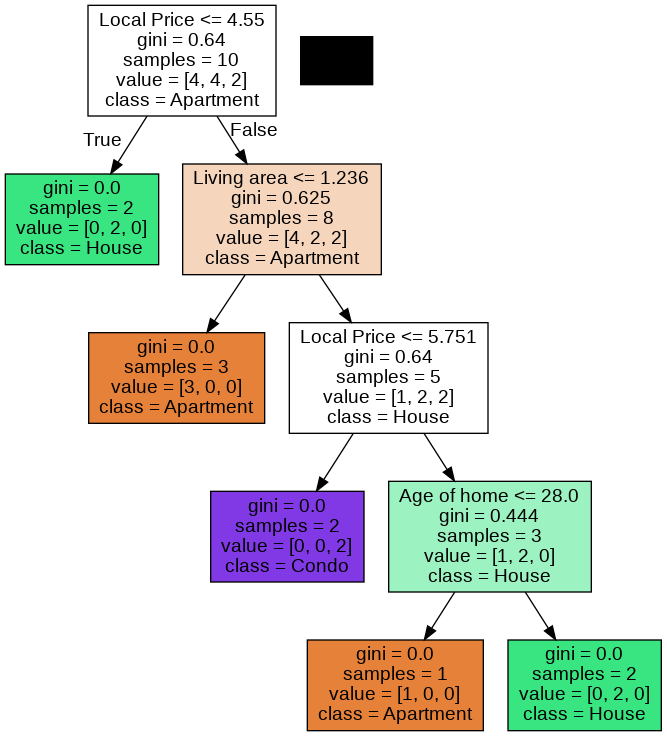

In [21]:
#Visualizing the tree
import pydotplus
from IPython.display import Image
dot_data_file = StringIO()
export_graphviz(clf, out_file=dot_data_file,  
                filled=True, feature_names = features,class_names=['Apartment','House','Condo'])
tree = pydotplus.graph_from_dot_data(dot_data_file.getvalue())  
Image(tree.create_png())



# Question 3

In [2]:
import pandas as pd
import numpy as np
import math
import operator

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset

input_data = pd.read_excel('/content/drive/MyDrive/CS5783 Assignment/Assignment 4 /Asssignment4_Data.xlsx')
print(input_data)

    House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0          1       4.9176        1.0     3.4720        0.998        1.0   
1          2       5.0208        1.0     3.5310        1.500        2.0   
2          3       4.5429        1.0     2.2750        1.175        1.0   
3          4       4.5573        1.0     4.0500        1.232        1.0   
4          5       5.0597        1.0     4.4550        1.121        1.0   
5          6       3.8910        1.0     4.4550        0.988        1.0   
6          7       5.8980        1.0     5.8500        1.240        1.0   
7          8       5.6039        1.0     9.5200        1.501        0.0   
8          9      16.4202        2.5     9.8000        3.420        2.0   
9         10      14.4598        2.5    12.8000        3.000        2.0   
10        11       5.8282        1.0     6.4350        1.225        2.0   
11        12       5.3003        1.0     4.9883        1.552        1.0   
12        13       6.2712

In [ ]:
#function to calculate the euclidean distance between the data points for the dataset provided for this assignment

def EUC_DIST(data_pt_1,data_pt_2,length):
  dist=0
  for i in range(length):
    dist += np.square(data_pt_1[i]-data_pt_2[i])
  return np.sqrt(dist)

In [ ]:
# K-Nearest Neighbour model

def knn(train_set,test_instance,k):
  distances={}
  sort = {}
  length = test_instance.shape[1]
  for l in range(len(train_set)):
    dist_new = EUC_DIST(test_instance,train_set.iloc[l],length)
    distances[l]=dist_new[0]

  #sorting based on the calculated distance
  sorted_d=sorted(distances.items(),key=operator.itemgetter(1))


  neighbors=[]

  #Getting k-neighbors

  for x in range(k):
    neighbors.append(sorted_d[x][0])
    classVotes = {}

  for x in range(len(neighbors)):
    response = train_set.iloc[neighbors[x]][-1]

    if response in classVotes:
      classVotes[response]+=1
    else:
      classVotes[response] = 1

  sortedVotes=sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)

  return(sortedVotes[0][0],neighbors)

testSet = [[7.2,3.6,5.1,2.5]]
test = pd.DataFrame(testSet)

print('\n\n With 1 Nearest Neighbor \n\n')
k=1
result,neigh = knn(input_data, test, k)

print('\n Predicted Class of the datapoint = ',result)

k = 3 
# Running KNN model 
result,neigh = knn(input_data, test, k) 
print('\n\nWith 3 Nearest Neighbours\n\n')
# Predicted class 
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

k = 5
# Running KNN model 
result,neigh = knn(input_data, test, k) 
print('\n\nWith 5 Nearest Neighbours\n\n')
# Predicted class 
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)



 With 1 Nearest Neighbor 



 Predicted Class of the datapoint =  Condo


With 3 Nearest Neighbours



Predicted class of the datapoint =  Apartment

Nearest Neighbours of the datapoints =  [5, 4, 3]


With 5 Nearest Neighbours



Predicted class of the datapoint =  Condo

Nearest Neighbours of the datapoints =  [5, 4, 3, 6, 2]
